In [19]:
#Imports NumPy and pandas for data handling.
import numpy as np 
import pandas as pd

In [3]:
#Loads the Chocolate Sales.csv file into a DataFrame and displays the first few rows.
df_choc = pd.read_csv("Chocolate Sales.csv")
df_choc.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
#Displays the shape of the DataFrame (rows, columns).
df_choc.shape

(1094, 6)

In [20]:
#Outputs column data types and non-null counts using .info().
df_choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sales Person     1094 non-null   object        
 1   Country          1094 non-null   object        
 2   Product          1094 non-null   object        
 3   Date             1094 non-null   datetime64[ns]
 4   Amount           1094 non-null   float64       
 5   Boxes Shipped    1094 non-null   int64         
 6   Revenue per Box  1094 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 60.0+ KB


In [6]:
#change type and format of Date Column
df_choc['Date'] = pd.to_datetime(df_choc['Date'], format='%d-%b-%y')

#Remove "$" and "," and "spaces" and change type into float of Amount Column
df_choc['Amount'] = df_choc['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

In [7]:
#Verifies the new data types with another .info() call.
df_choc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   float64       
 5   Boxes Shipped  1094 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [21]:
df_choc.sample(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Revenue per Box
188,Husein Augar,New Zealand,Caramel Stuffed Bars,2022-01-27,497.0,475,1.046316
360,Roddy Speechley,New Zealand,50% Dark Bites,2022-05-09,4312.0,211,20.436019
932,Ches Bonnell,India,50% Dark Bites,2022-04-15,11298.0,313,36.095847
161,Jehu Rudeforth,Canada,Milk Bars,2022-02-21,7203.0,12,600.250000
581,Van Tuxwell,India,Almond Choco,2022-06-14,6426.0,390,16.476923


In [9]:
#Checks for missing values in each column.
df_choc.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [10]:
#Checks for duplicated rows in the dataset.
df_choc.duplicated().sum()

0

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

##  Total Sales by Country
This horizontal bar plot shows the total sales amount by country. Countries are sorted from highest to lowest sales, making it easy to identify the strongest markets. This visualization is useful for targeting high-performing regions or investigating underperforming ones.


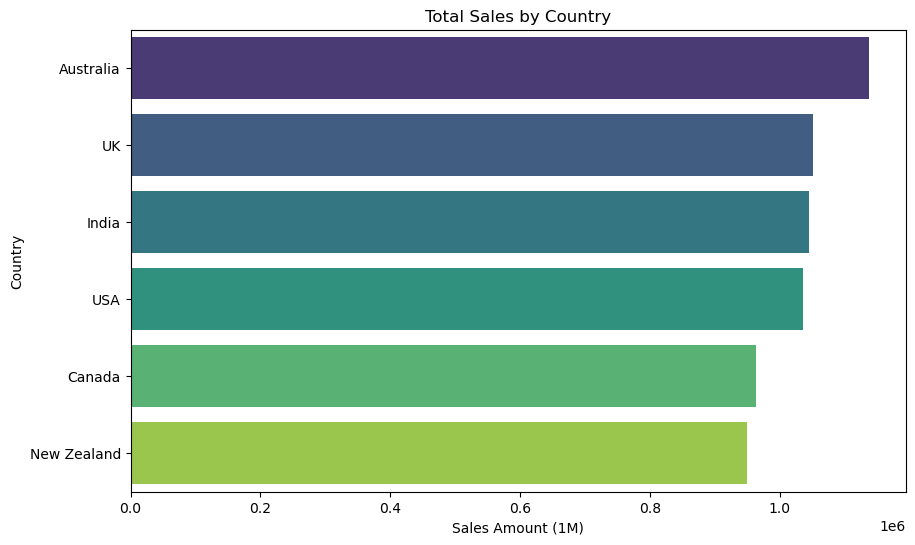

In [23]:
country_sales = df_choc.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data= country_sales, x='Amount', y='Country', palette='viridis')
plt.title('Total Sales by Country')
plt.xlabel('Sales Amount (1M)')
plt.ylabel('Country')
plt.show()

## Top 10 Salespeople by Total Sales
A bar chart ranks the top 10 salespeople by the total revenue they generated. It highlights your most successful team members and helps recognize individual performance for potential incentives or training.


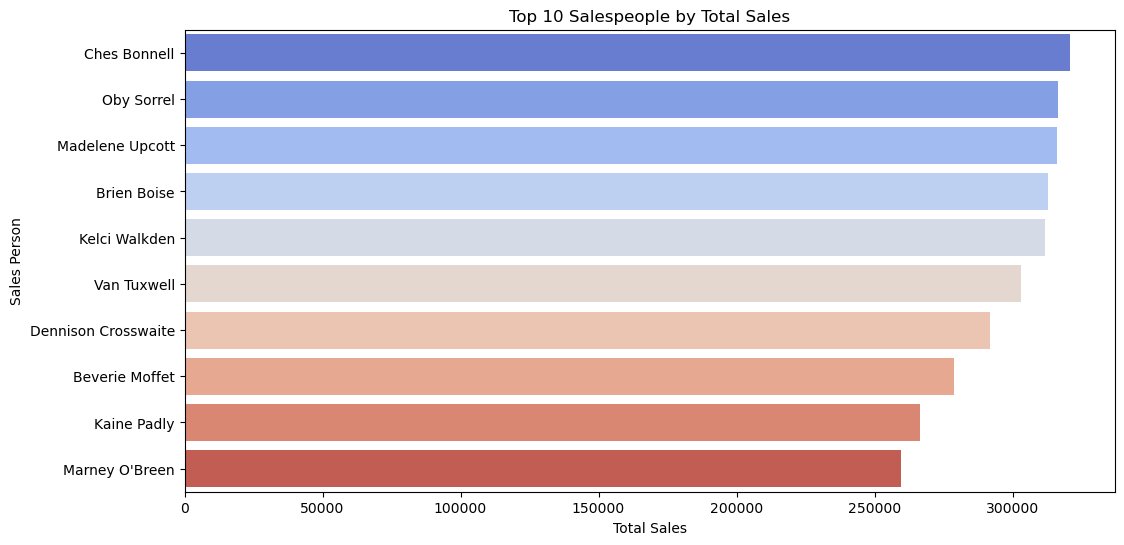

In [12]:
top_salespeople = df_choc.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_salespeople, x='Amount', y='Sales Person', palette='coolwarm')
plt.title('Top 10 Salespeople by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sales Person')
plt.show()

## Average Revenue per Box by Product
This chart displays the average amount of money earned per box shipped, broken down by product. It’s valuable for understanding which products are the most profitable on a per-unit basis, regardless of volume.

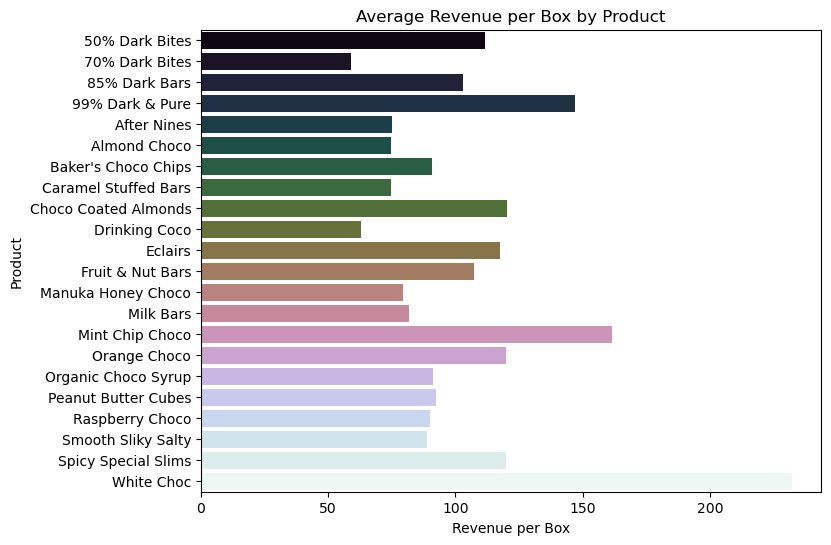

In [13]:
df_choc['Revenue per Box'] = df_choc['Amount'] / df_choc['Boxes Shipped']
avg_per_box = df_choc.groupby('Product')['Revenue per Box'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_per_box, x='Revenue per Box', y='Product', palette='cubehelix')
plt.title('Average Revenue per Box by Product')
plt.show()


## Total Boxes Shipped by Country
A bar plot showing the total number of boxes shipped to each country. While the sales revenue chart shows financial performance, this plot focuses on volume, helping to identify high-demand regions.



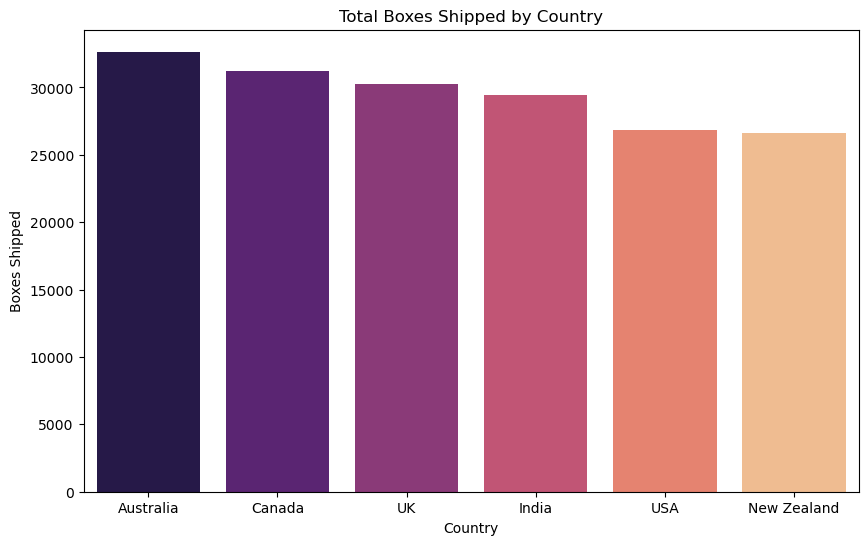

In [14]:
country_boxes = df_choc.groupby('Country')['Boxes Shipped'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_boxes, y='Boxes Shipped', x='Country', palette='magma')
plt.title('Total Boxes Shipped by Country')
plt.xlabel('Country')
plt.ylabel('Boxes Shipped')
plt.show()


## Sales Amount Distribution by Product
A box plot that illustrates the distribution of sales amounts for each product. This graph reveals the spread and outliers in revenue for different products, which is useful for spotting inconsistencies or high-variance items

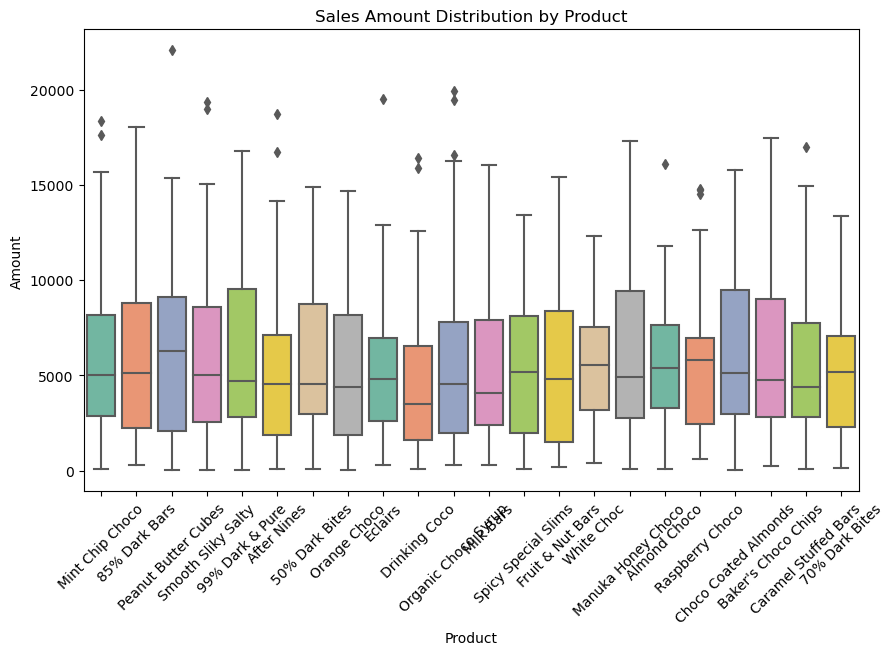

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_choc, x='Product', y='Amount', palette='Set2')
plt.title('Sales Amount Distribution by Product')
plt.xticks(rotation=45)
plt.show()

## Sales Amount Distribution by Product (continued)
A box plot visualizing the distribution of sales across products. It shows the median, interquartile range, and any outliers. This is helpful to assess consistency and variability in product performance.

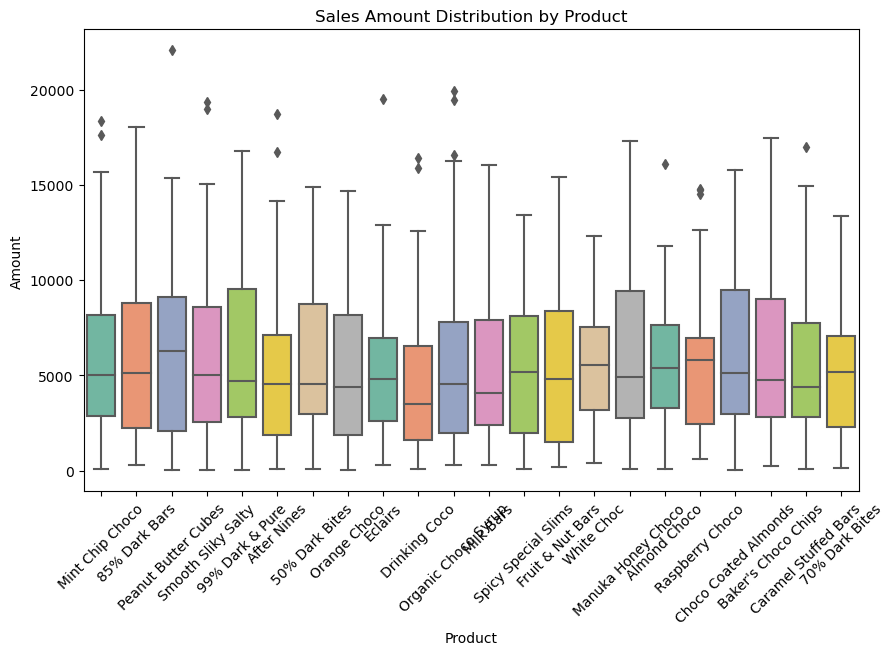

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_choc, x='Product', y='Amount', palette='Set2')
plt.title('Sales Amount Distribution by Product')
plt.xticks(rotation=45)
plt.show()

## Boxes Shipped vs. Sales Amount
This scatter plot compares the number of boxes shipped to the total sales amount, with points colored by product type. It reveals the correlation between volume and revenue, and can highlight products that generate high revenue even with fewer units.

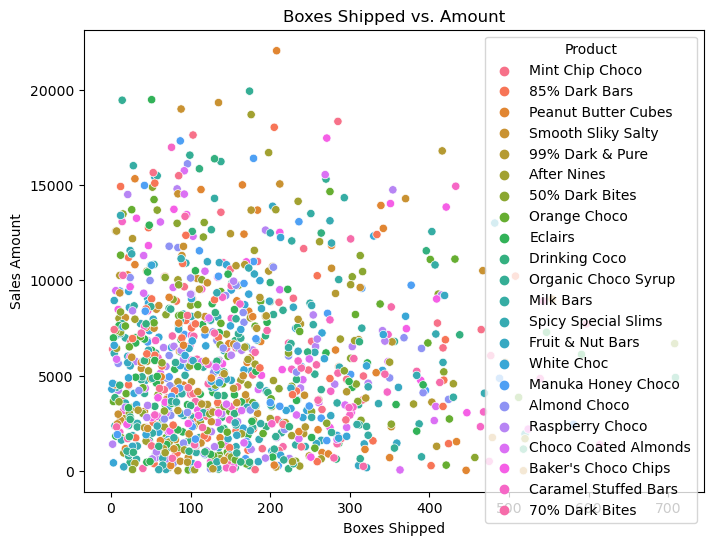

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_choc, x='Boxes Shipped', y='Amount', hue='Product')
plt.title('Boxes Shipped vs. Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.show()

## Sales Heatmap by Country and Product
A heatmap showing total sales by country and product combination. Darker colors indicate higher sales. This visualization is great for spotting product preferences in different regions and tailoring marketing strategies accordingly.

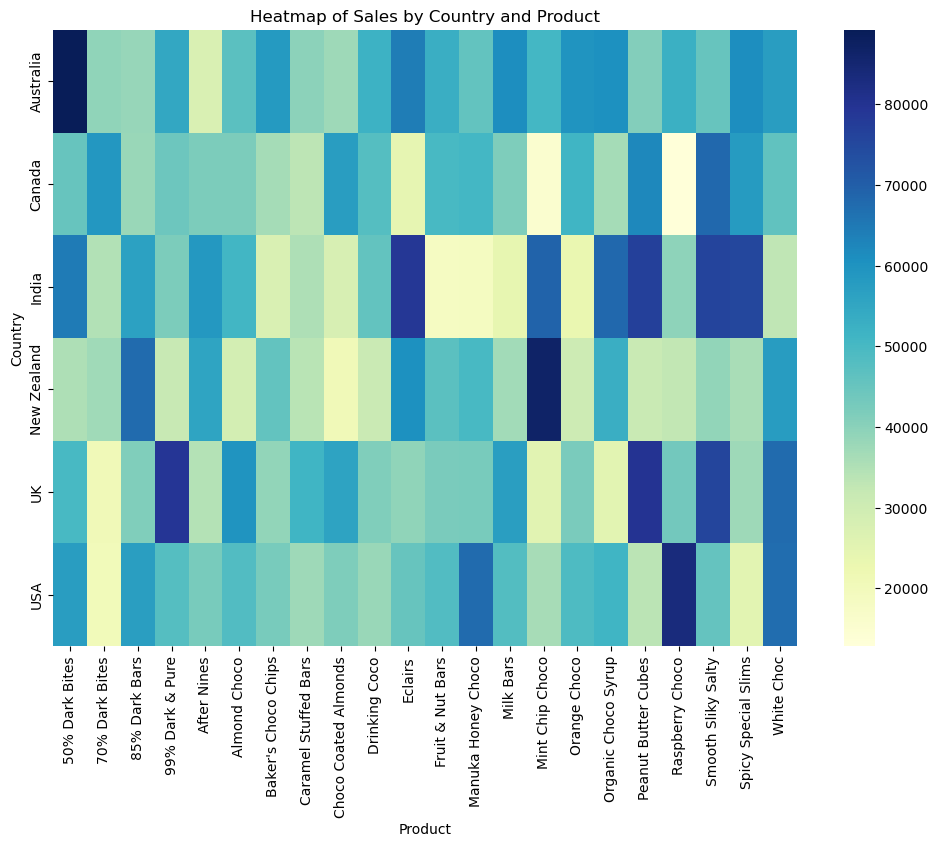

In [18]:
pivot = df_choc.pivot_table(index='Country', columns='Product', values='Amount', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=False, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Country and Product')
plt.xlabel('Product')
plt.ylabel('Country')
plt.show()
